<a href="https://colab.research.google.com/github/truc-h-nguyen/Toddler-activity-suggestions/blob/main/COCO_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A. Preparation**

Load needed libraries. Then in the next part, we'll load "bowl" dataset, create masks, then create image augmentation for training.

In [1]:
!pip install fiftyone
import fiftyone.zoo as foz
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from itertools import product

     |████████████████████████████████| 1.2 MB 5.1 MB/s 
     |████████████████████████████████| 13.2 MB 17.2 MB/s 
     |████████████████████████████████| 79.9 MB 107 kB/s 
     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 562 kB 36.6 MB/s 
     |████████████████████████████████| 131 kB 53.1 MB/s 
     |████████████████████████████████| 226 kB 50.1 MB/s 
     |████████████████████████████████| 106 kB 46.3 MB/s 
     |████████████████████████████████| 47.6 MB 1.4 MB/s 
     |████████████████████████████████| 639 kB 39.9 MB/s 
     |████████████████████████████████| 29.2 MB 1.4 MB/s 
     |████████████████████████████████| 83 kB 1.9 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 78 kB 6.5 MB/s 
     |████████████████████████████████| 77 kB 5.8 MB/s 
     |████████████████████████████████| 8.4 MB 51.8 MB/s 
     |████████████████████

In [2]:
!conda install -c conda-forge keras
!pip install git+https://github.com/qubvel/efficientnet
!pip install git+https://github.com/qubvel/classification_models.git
!pip install git+https://github.com/qubvel/segmentation_models
!pip install git+https://github.com/albu/albumentations
!pip install tta-wrapper

/bin/bash: conda: command not found
  Cloning https://github.com/qubvel/efficientnet to /tmp/pip-req-build-bgzehdwy
  Running command git clone -q https://github.com/qubvel/efficientnet /tmp/pip-req-build-bgzehdwy
     |████████████████████████████████| 50 kB 2.8 MB/s 
  Created wheel for efficientnet: filename=efficientnet-1.1.1-py3-none-any.whl size=18447 sha256=bb4d092691e71e5c13af85f1169956b2f3a9174284454b5a7c39798bd05be41f
  Stored in directory: /tmp/pip-ephem-wheel-cache-gv_mxxrq/wheels/11/69/85/814d64d694c96db0eef17b718042d644a1e54f113920481920
Successfully built efficientnet
  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-wqmjr3h6
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-wqmjr3h6
  Running command git submodule update --init --recursive -q
  Created wheel for image-classifiers: filename=image_classifiers-1.0.0-py3-none-any.whl size=20045 sha256=a67877c8b9476ffed2d24d949a87537bc96481

In [3]:
!pip install -U albumentations

In [4]:
import albumentations as A
import random

In [5]:
import os
import shutil
import glob
import random
import cv2

**B. "Bowl" dataset**

In [6]:
# bowl_set = foz.load_zoo_dataset(
#     "coco-2017",
#     split="train",
#     label_types=["segmentations"],
#     classes=["bowl"],
#     max_samples=40,
# )

In [7]:
# for idx, sample in enumerate(bowl_set):
#     if idx > 6:
#         break
#     img = sample['filepath'] #/root/fiftyone/coco-2017/train/data/000000000590.jpg
#     img = mpimg.imread(img)
#     useful_detections = [d for d in sample['ground_truth']['detections'] if d['label'] in ['bowl']]
#     bbox = useful_detections[0]['bounding_box']

In [8]:
# x,y,w,h = bbox
# print(bbox)
# mask = np.zeros(img.shape[:2])    
# def possible_slices(x,w,y,h):
#         xslices = [
#                    slice(int(np.floor(x*img.shape[1])), int(np.floor((x+w)*img.shape[1]))),
#                    slice(int(np.ceil(x*img.shape[1])), int(np.floor((x+w)*img.shape[1]))),
#                    slice(int(np.floor(x*img.shape[1])), int(np.ceil((x+w)*img.shape[1]))),
#                    slice(int(np.ceil(x*img.shape[1])), int(np.ceil((x+w)*img.shape[1]))),
#         ]
#         yslices = [
#                    slice(int(np.floor(y*img.shape[0])), int(np.floor((y+h)*img.shape[0]))),
#                    slice(int(np.ceil(y*img.shape[0])), int(np.floor((y+h)*img.shape[0]))),
#                    slice(int(np.floor(y*img.shape[0])), int(np.ceil((y+h)*img.shape[0]))),
#                    slice(int(np.ceil(y*img.shape[0])), int(np.ceil((y+h)*img.shape[0]))),
#         ]
#         return list(product(xslices,yslices))

# for detection in range(len(useful_detections)):
#       bbox = useful_detections[detection]['bounding_box']
#       x,y,w,h = bbox
#       all_possible_slices = possible_slices(x,w,y,h)
    
#       completed = False
#       for xslice, yslice in all_possible_slices:
#           if completed: continue
#           try:
#               mask[yslice, xslice] += useful_detections[detection]['mask']
#               completed = True
#           except:
#               pass

# fig, ax = plt.subplots(ncols=3, figsize=(20,6), sharex=True, sharey=True)
# fig.suptitle(len(useful_detections))
# ax[0].imshow(img)
# ax[1].imshow(mask)
# ax[2].scatter(img.shape[1] * np.array([x,x,x+w,x+w]), img.shape[0] * np.array([y,y+h,y,y+h]), color='r')
# ax[2].imshow(useful_detections[0]['mask'])
# ax[0].imshow(mask, alpha=0.5)
# ax[0].scatter(img.shape[1] * np.array([x,x,x+w,x+w]), img.shape[0] * np.array([y,y+h,y,y+h]), color='r')
# plt.tight_layout()
# plt.show()

**Transform**

In [9]:
# img_size = 200
# transform = A.Compose([
#     A.Resize(img_size, img_size, p=1),
#     A.HorizontalFlip(p=0.5),
#     #A.RandomBrightnessContrast(brightness_limit=0.8, contrast_limit=0.9,p=0.2),
#     A.Blur(blur_limit=20,p=0.3),
#     A.Sharpen(alpha=(0.2, 0.5), lightness=(0.5, 1.0), p=0.5),
#     A.Transpose(p=0.4),
#     #A.HueSaturationValue(p=0.5)
# ])

**Create img and mask array**

In [10]:
# mask_array = []
# img_array = []
# for idx, sample in enumerate(bowl_set):
#   img = sample['filepath']
#   img = mpimg.imread(img)
#   img_array.append(img)
#   useful_detections = [d for d in sample['ground_truth']['detections'] if d['label'] in ['bowl']]
#   bbox = useful_detections[0]['bounding_box']
#   x,y,w,h = bbox
#   mask = np.zeros(img.shape[:2])
#   stacked_mask = np.zeros(img.shape[:2])    
#   def possible_slices(x,w,y,h):
#         xslices = [
#                    slice(int(np.floor(x*img.shape[1])), int(np.floor((x+w)*img.shape[1]))),
#                    slice(int(np.ceil(x*img.shape[1])), int(np.floor((x+w)*img.shape[1]))),
#                    slice(int(np.floor(x*img.shape[1])), int(np.ceil((x+w)*img.shape[1]))),
#                    slice(int(np.ceil(x*img.shape[1])), int(np.ceil((x+w)*img.shape[1]))),
#         ]
#         yslices = [
#                    slice(int(np.floor(y*img.shape[0])), int(np.floor((y+h)*img.shape[0]))),
#                    slice(int(np.ceil(y*img.shape[0])), int(np.floor((y+h)*img.shape[0]))),
#                    slice(int(np.floor(y*img.shape[0])), int(np.ceil((y+h)*img.shape[0]))),
#                    slice(int(np.ceil(y*img.shape[0])), int(np.ceil((y+h)*img.shape[0]))),
#         ]
#         return list(product(xslices,yslices))

#   for detection in range(len(useful_detections)):
#       bbox = useful_detections[detection]['bounding_box']
#       x,y,w,h = bbox
#       all_possible_slices = possible_slices(x,w,y,h)

#       completed = False
#       for xslice, yslice in all_possible_slices:
#           if completed: continue
#           try:
#               mask[yslice, xslice] += useful_detections[detection]['mask']
#               completed = True
#               stacked_mask = cv2.bitwise_or(stacked_mask, mask)
#           except:
#               pass
#   mask_array.append(stacked_mask)

In [11]:
# plt.imshow(img_array[23])

In [12]:
# print(len(mask_array))
# print(len(img_array))
# print(mask.shape)
# print(img.shape)

In [13]:
# print(len(mask_array[0].shape))

**Create Data Generator**

In [14]:
# img_size = 160
# transform = A.Compose([
#     A.Resize(img_size, img_size, p=1),
#     A.HorizontalFlip(p=0.5),
#     #A.RandomBrightnessContrast(brightness_limit=0.8, contrast_limit=0.9,p=0.2),
#     A.Blur(blur_limit=5,p=0.3),
#     #A.Sharpen(alpha=(0.2, 0.5), lightness=(0.5, 1.0), p=0.5),
#     A.Transpose(p=0.4),
#     #A.HueSaturationValue(p=0.5)
# ])

In [15]:
# import tensorflow.keras as keras

In [16]:
# from tensorflow.python.keras.utils.data_utils import Sequence

In [17]:
# class DataGenerator(keras.utils.Sequence):
#   def __init__(self, my_img_array = img_array, my_mask_array = mask_array, image_size=img_size, augmentation=False, shuffle = False, batch_size = 1, seed = 40):
#     self.image_size = image_size
#     self.augmentation = augmentation 
#     self.shuffle = shuffle
#     self.batch_size = batch_size
#     self.my_img_array = img_array
#     self.my_mask_array = mask_array
#     self.nb_y_features = 1 if len(mask_array[0].shape) == 2 else mask_array[0].shape[2]
#     random.seed(seed)

#   def __len__(self):
#         return len(self.my_img_array) // self.batch_size

#   def __getitem__(self, index):
#      data_index_min = int(index*self.batch_size)
#      data_index_max = int(min((index+1)*self.batch_size, len(self.my_img_array)))

#      indexes = self.my_img_array[data_index_min:data_index_max]
#      this_batch_size = len(indexes)

#      X = np.empty((this_batch_size, self.image_size, self.image_size, 3), dtype=np.float32)
#      y = np.empty((this_batch_size, self.image_size, self.image_size, self.nb_y_features), dtype=np.uint8)
     
#      for i, sample_index in enumerate(indexes):
#           X_sample = self.my_img_array[index * self.batch_size + i]
#           y_sample = self.my_mask_array[index * self.batch_size + i]

#           if self.augmentation is True:
#               # Augmentation code
#               #transformed_imgs, transformed_masks = transform(image=X_sample, mask = y_sample)
#               #transformed_masks = transform(image=y_sample)
#               #image_augm = transformed_imgs['image']
#               #mask_augm = transformed_masks['mask'].reshape(self.image_size, self.image_size, self.nb_y_features)
#               # divide by 255 to normalize images from 0 to 1
#               #X[i, ...] = image_augm/255
#               #y[i, ...] = mask_augm
#               aug = transform(image = X_sample, mask = y_sample)
#               img_aug = aug['image']
#               mask_aug = aug['mask'].reshape(self.image_size, self.image_size, self.nb_y_features).astype(np.uint8)
#               X[i, ...] = img_aug/255
#               y[i, ...] = mask_aug
#           else:
#               pass
#      return X, y
     

In [18]:
# train_generator = DataGenerator(my_img_array = img_array, my_mask_array = mask_array, 
#                                 image_size=160, augmentation=True, shuffle = False, batch_size = 3)
# # val_generator = DataGenerator(my_img_array = val_img_array, my_mask_array = val_mask_array, 
# #                                 image_size=160, augmentation=True, shuffle = False, batch_size = 3)
# for i in range(5):
#   X_sample_temp, y_sample_temp = train_generator[3]
#   #plt.imshow(X_sample_temp[1])
#   #plt.imshow(y_sample_temp[1,:,:,0])
#   fig, ax = plt.subplots(ncols=2)
#   ax[0].imshow(X_sample_temp[1])
#   ax[1].imshow(y_sample_temp[1,:,:,0])
#   plt.show()

In [19]:
# import tensorflow.keras as keras

In [20]:
# from tensorflow.keras import layers


# def get_model(img_size, num_classes):
#     inputs = keras.Input(shape=img_size + (3,))

#     ### [First half of the network: downsampling inputs] ###

#     # Entry block
#     x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
#     x = layers.BatchNormalization()(x)
#     x = layers.Activation("relu")(x)

#     previous_block_activation = x  # Set aside residual

#     # Blocks 1, 2, 3 are identical apart from the feature depth.
#     for filters in [64, 128, 256]:
#         x = layers.Activation("relu")(x)
#         x = layers.SeparableConv2D(filters, 3, padding="same")(x)
#         x = layers.BatchNormalization()(x)

#         x = layers.Activation("relu")(x)
#         x = layers.SeparableConv2D(filters, 3, padding="same")(x)
#         x = layers.BatchNormalization()(x)

#         x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

#         # Project residual
#         residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
#             previous_block_activation
#         )
#         x = layers.add([x, residual])  # Add back residual
#         previous_block_activation = x  # Set aside next residual

#     ### [Second half of the network: upsampling inputs] ###

#     for filters in [256, 128, 64, 32]:
#         x = layers.Activation("relu")(x)
#         x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
#         x = layers.BatchNormalization()(x)

#         x = layers.Activation("relu")(x)
#         x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
#         x = layers.BatchNormalization()(x)

#         x = layers.UpSampling2D(2)(x)

#         # Project residual
#         residual = layers.UpSampling2D(2)(previous_block_activation)
#         residual = layers.Conv2D(filters, 1, padding="same")(residual)
#         x = layers.add([x, residual])  # Add back residual
#         previous_block_activation = x  # Set aside next residual

#     # Add a per-pixel classification layer
#     outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

#     # Define the model
#     model = keras.Model(inputs, outputs)
#     return model


# # Free up RAM in case the model definition cells were run multiple times
# #keras.backend.clear_session()

# # Build model
# model = get_model((img_size,img_size), 1)
# model.summary()

In [21]:
# # model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")
# model.compile(optimizer="rmsprop", loss = 'binary_crossentropy')

In [22]:
# model.fit(
#     train_generator,
#     #val_generator,
#     epochs = 10,
# )

In [23]:
# model.history.history

In [24]:
# plt.plot(model.history.history["loss"])

In [25]:
# model.fit(train_gen, epochs=epochs, validation_data=val_gen, callbacks=callbacks)


In [26]:
# y_pr = model.predict(train_generator[0][0],batch_size=3)

In [27]:
# for y_mask in y_pr:
#   plt.imshow(y_mask[:,:,0])
#   plt.show()

**C. Multi class datasets**

**LOAD DATASET**

In [28]:
multi_set = foz.load_zoo_dataset(
    "coco-2017",
    split="train",
    label_types=["segmentations"],
    classes=["scissors", "bowl", "spoon", "hair drier", "bottle", "toothbrush", "apple"],
    max_samples=100,
)

 100% |██████|    1.9Gb/1.9Gb [2.5s elapsed, 0s remaining, 742.6Mb/s]      
Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_train2017.json'
 100% |██████████████████| 100/100 [8.7s elapsed, 0s remaining, 11.3 images/s]      
Writing annotations for 100 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'
Dataset info written to '/root/fiftyone/coco-2017/info.json'
Loading 'coco-2017' split 'train'
 100% |█████████████████| 100/100 [2.9s elapsed, 0s remaining, 37.7 samples/s]      
Dataset 'coco-2017-train-100' created


**EXPLORATORY**

In [29]:
for idx, sample in enumerate(multi_set):
  if idx > 25: 
    break
  img = sample['filepath']
  img = mpimg.imread(img)
  useful_detections = [d for d in sample['ground_truth']['detections'] if d['label'] in ["scissors", "bowl", "spoon", "hair drier", "bottle", "toothbrush", "apple"]]
  bbox = useful_detections[0]['bounding_box']
# plt.imshow(img)
# print(useful_detections)
# print(bbox)

Segmentation for the image above: bowls, bottles are detected

[0.302265625, 0.478957345971564, 0.04375, 0.03338862559241706]


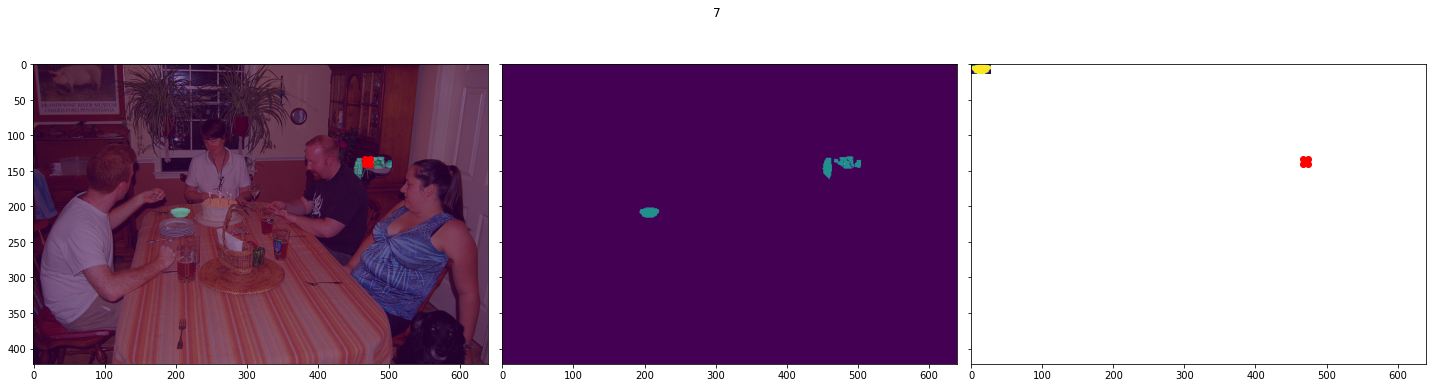

In [30]:
x,y,w,h = bbox
print(bbox)
mask = np.zeros(img.shape[:2])    
def possible_slices(x,w,y,h):
        xslices = [
                   slice(int(np.floor(x*img.shape[1])), int(np.floor((x+w)*img.shape[1]))),
                   slice(int(np.ceil(x*img.shape[1])), int(np.floor((x+w)*img.shape[1]))),
                   slice(int(np.floor(x*img.shape[1])), int(np.ceil((x+w)*img.shape[1]))),
                   slice(int(np.ceil(x*img.shape[1])), int(np.ceil((x+w)*img.shape[1]))),
        ]
        yslices = [
                   slice(int(np.floor(y*img.shape[0])), int(np.floor((y+h)*img.shape[0]))),
                   slice(int(np.ceil(y*img.shape[0])), int(np.floor((y+h)*img.shape[0]))),
                   slice(int(np.floor(y*img.shape[0])), int(np.ceil((y+h)*img.shape[0]))),
                   slice(int(np.ceil(y*img.shape[0])), int(np.ceil((y+h)*img.shape[0]))),
        ]
        return list(product(xslices,yslices))

for detection in range(len(useful_detections)):
      bbox = useful_detections[detection]['bounding_box']
      x,y,w,h = bbox
      all_possible_slices = possible_slices(x,w,y,h)
    
      completed = False
      for xslice, yslice in all_possible_slices:
          if completed: continue
          try:
              mask[yslice, xslice] += useful_detections[detection]['mask']
              completed = True
          except:
              pass

fig, ax = plt.subplots(ncols=3, figsize=(20,6), sharex=True, sharey=True)
fig.suptitle(len(useful_detections))
ax[0].imshow(img)
ax[1].imshow(mask)
ax[2].scatter(img.shape[1] * np.array([x,x,x+w,x+w]), img.shape[0] * np.array([y,y+h,y,y+h]), color='r')
ax[2].imshow(useful_detections[0]['mask'])
ax[0].imshow(mask, alpha=0.5)
ax[0].scatter(img.shape[1] * np.array([x,x,x+w,x+w]), img.shape[0] * np.array([y,y+h,y,y+h]), color='r')
plt.tight_layout()
plt.show()

**CREATE MASK**

In [31]:
mask_array = []
img_array = []
for idx, sample in enumerate(multi_set):
  img = sample['filepath']
  img = mpimg.imread(img)
  img_array.append(img)
  useful_detections = [d for d in sample['ground_truth']['detections'] if d['label'] in ['bowl',"scissors", "bowl", "spoon", "hair drier", "bottle", "toothbrush", "apple"]]
  bbox = useful_detections[0]['bounding_box']
  x,y,w,h = bbox
  mask = np.zeros(img.shape[:2])
  stacked_mask = np.zeros(img.shape[:2])    
  def possible_slices(x,w,y,h):
        xslices = [
                   slice(int(np.floor(x*img.shape[1])), int(np.floor((x+w)*img.shape[1]))),
                   slice(int(np.ceil(x*img.shape[1])), int(np.floor((x+w)*img.shape[1]))),
                   slice(int(np.floor(x*img.shape[1])), int(np.ceil((x+w)*img.shape[1]))),
                   slice(int(np.ceil(x*img.shape[1])), int(np.ceil((x+w)*img.shape[1]))),
        ]
        yslices = [
                   slice(int(np.floor(y*img.shape[0])), int(np.floor((y+h)*img.shape[0]))),
                   slice(int(np.ceil(y*img.shape[0])), int(np.floor((y+h)*img.shape[0]))),
                   slice(int(np.floor(y*img.shape[0])), int(np.ceil((y+h)*img.shape[0]))),
                   slice(int(np.ceil(y*img.shape[0])), int(np.ceil((y+h)*img.shape[0]))),
        ]
        return list(product(xslices,yslices))

  for detection in range(len(useful_detections)):
      bbox = useful_detections[detection]['bounding_box']
      x,y,w,h = bbox
      all_possible_slices = possible_slices(x,w,y,h)

      completed = False
      for xslice, yslice in all_possible_slices:
          if completed: continue
          try:
              mask[yslice, xslice] += useful_detections[detection]['mask']
              completed = True
              stacked_mask = cv2.bitwise_or(stacked_mask, mask)
          except:
              pass
  mask_array.append(stacked_mask)

**CREATE DATAGENERATOR**

**Transformation**

In [32]:
img_size = 200
transform = A.Compose([
    A.Resize(img_size, img_size, p=1),
    A.HorizontalFlip(p=0.5),
    #A.RandomBrightnessContrast(brightness_limit=0.8, contrast_limit=0.9,p=0.2),
    A.Blur(blur_limit=20,p=0.3),
    A.Sharpen(alpha=(0.2, 0.5), lightness=(0.5, 1.0), p=0.5),
    A.Transpose(p=0.4),
    #A.HueSaturationValue(p=0.5)
])

**Split train/validation set**

In [83]:
from sklearn.model_selection import train_test_split

img_train_array, img_test, mask_train, mask_test = train_test_split(img_array, mask_array, test_size=0.20, random_state=42)

In [49]:
import tensorflow.keras as keras
from tensorflow.python.keras.utils.data_utils import Sequence

class DataGenerator(keras.utils.Sequence):
  def __init__(self, my_img_array, my_mask_array, image_size, augmentation=False, shuffle = False, batch_size = 1, seed = 40):
    self.image_size = image_size
    self.augmentation = augmentation 
    self.shuffle = shuffle
    self.batch_size = batch_size
    self.my_img_array = img_array
    self.my_mask_array = mask_array
    self.nb_y_features = 1 if len(mask_array[0].shape) == 2 else mask_array[0].shape[2]
    random.seed(seed)

  def __len__(self):
        return len(self.my_img_array) // self.batch_size

  def __getitem__(self, index):
     data_index_min = int(index*self.batch_size)
     data_index_max = int(min((index+1)*self.batch_size, len(self.my_img_array)))

     indexes = self.my_img_array[data_index_min:data_index_max]
     this_batch_size = len(indexes)

     X = np.empty((this_batch_size, self.image_size, self.image_size, 3), dtype=np.float32)
     y = np.empty((this_batch_size, self.image_size, self.image_size, self.nb_y_features), dtype=np.uint8)
     
     for i, sample_index in enumerate(indexes):
          X_sample = self.my_img_array[index * self.batch_size + i]
          y_sample = self.my_mask_array[index * self.batch_size + i]

          if self.augmentation is True:
              # Augmentation code
              #transformed_imgs, transformed_masks = transform(image=X_sample, mask = y_sample)
              #transformed_masks = transform(image=y_sample)
              #image_augm = transformed_imgs['image']
              #mask_augm = transformed_masks['mask'].reshape(self.image_size, self.image_size, self.nb_y_features)
              # divide by 255 to normalize images from 0 to 1
              #X[i, ...] = image_augm/255
              #y[i, ...] = mask_augm
              aug = transform(image = X_sample, mask = y_sample)
              img_aug = aug['image']
              mask_aug = aug['mask'].reshape(self.image_size, self.image_size, self.nb_y_features).astype(np.uint8)
              X[i, ...] = img_aug/255
              y[i, ...] = mask_aug
          else:
              pass
     return X, y
     

In [12]:
train_generator = DataGenerator(my_img_array = img_array, my_mask_array = mask_array, 
                                image_size=160, augmentation=True, shuffle = False, batch_size = 3)
# val_generator = DataGenerator(my_img_array = val_img_array, my_mask_array = val_mask_array, 
#                                 image_size=160, augmentation=True, shuffle = False, batch_size = 3)
for i in range(5):
  X_sample_temp, y_sample_temp = train_generator[3]
  #plt.imshow(X_sample_temp[1])
  #plt.imshow(y_sample_temp[1,:,:,0])
  fig, ax = plt.subplots(ncols=2)
  ax[0].imshow(X_sample_temp[1])
  ax[1].imshow(y_sample_temp[1,:,:,0])
  plt.show()

ValueError: ignored